___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way.

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [2]:
soldiers_male = pd.read_csv("ANSUR II MALE Public.csv", encoding="'ISO-8859-1'")
soldiers_female = pd.read_csv("ANSUR II FEMALE Public.csv", encoding="'ISO-8859-1'")


In [3]:
new_top_data = pd.concat([soldiers_female, soldiers_male], axis=0)

In [4]:
df = new_top_data.copy()

In [5]:
df.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,subjectid
0,10037.0,231,1282,301,204,1180,222,177,373,315,...,92Y,Germany,2,NaN,2,26,61,142,Right hand,NaN
1,10038.0,194,1379,320,207,1292,225,178,372,272,...,25U,California,3,Mexican,3,21,64,120,Right hand,NaN
2,10042.0,183,1369,329,233,1271,237,196,397,300,...,35D,Texas,1,NaN,1,23,68,147,Right hand,NaN
3,10043.0,261,1356,306,214,1250,240,188,384,364,...,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand,NaN
4,10051.0,309,1303,308,214,1210,217,182,378,320,...,42A,Texas,1,NaN,1,45,63,195,Right hand,NaN


In [6]:
df.shape

(6068, 109)

In [7]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 6068 entries, 0 to 4081
Data columns (total 109 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    SubjectId                       float64
 1    abdominalextensiondepthsitting  int64  
 2    acromialheight                  int64  
 3    acromionradialelength           int64  
 4    anklecircumference              int64  
 5    axillaheight                    int64  
 6    balloffootcircumference         int64  
 7    balloffootlength                int64  
 8    biacromialbreadth               int64  
 9    bicepscircumferenceflexed       int64  
 10   bicristalbreadth                int64  
 11   bideltoidbreadth                int64  
 12   bimalleolarbreadth              int64  
 13   bitragionchinarc                int64  
 14   bitragionsubmandibulararc       int64  
 15   bizygomaticbreadth              int64  
 16   buttockcircumference            int64  
 17   buttockdepth     

In [8]:
df.isnull().sum().sort_values(ascending=False)

Ethnicity                4647
SubjectId                4082
subjectid                1986
acromionradialelength       0
tragiontopofhead            0
                         ... 
footbreadthhorizontal       0
eyeheightsitting            0
elbowrestheight             0
earprotrusion               0
interscyei                  0
Length: 109, dtype: int64

## Explore Data

In [9]:
#pd.set_option('display.max_rows', None)

In [10]:
df["SubjectsBirthLocation"].value_counts(dropna=False)

SubjectsBirthLocation
California    446
New York      420
Texas         397
Indiana       266
Oklahoma      221
             ... 
Zambia          1
Bahamas         1
Serbia          1
Sri Lanka       1
Guatemala       1
Name: count, Length: 152, dtype: int64

In [11]:
df_new = df.drop(["SubjectId","subjectid", "SubjectNumericRace",  "Ethnicity" 
                  , "Date",  "Installation"  ,"PrimaryMOS" ,"Heightin"
                  ,"Weightlbs", "Component" , "Branch" , "Age" 
                  ,"WritingPreference"],axis=1)

In [12]:
df_new["DODRace"].value_counts(dropna=False)

DODRace
1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: count, dtype: int64

In [13]:
value_counts = df_new["DODRace"].value_counts(dropna=False)
filtered_value_counts = value_counts[value_counts >= 500]

valid_indices = filtered_value_counts.index

df_filtered = df_new[df_new["DODRace"].isin(valid_indices)]



In [14]:
df_filtered.shape

(5769, 96)

In [15]:
df_filtered["DODRace"].value_counts(dropna=False)

DODRace
1    3792
2    1298
3     679
Name: count, dtype: int64

In [16]:
df_filtered["SubjectsBirthLocation"].value_counts(dropna=False)

SubjectsBirthLocation
California                417
New York                  411
Texas                     386
Indiana                   264
Illinois                  210
                         ... 
Bosnia and Herzegovina      1
Bermuda                     1
Denmark                     1
South Korea                 1
Guatemala                   1
Name: count, Length: 136, dtype: int64

In [17]:
df1 = df_filtered.copy()

In [18]:
df1['DODRace'] = df1['DODRace'].map({
1:'White', 2:'Black', 3:'Hispanic'})

In [19]:
df1['DODRace'].value_counts(dropna=False)

DODRace
White       3792
Black       1298
Hispanic     679
Name: count, dtype: int64

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5769 entries, 0 to 4081
Data columns (total 96 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   abdominalextensiondepthsitting  5769 non-null   int64 
 1   acromialheight                  5769 non-null   int64 
 2   acromionradialelength           5769 non-null   int64 
 3   anklecircumference              5769 non-null   int64 
 4   axillaheight                    5769 non-null   int64 
 5   balloffootcircumference         5769 non-null   int64 
 6   balloffootlength                5769 non-null   int64 
 7   biacromialbreadth               5769 non-null   int64 
 8   bicepscircumferenceflexed       5769 non-null   int64 
 9   bicristalbreadth                5769 non-null   int64 
 10  bideltoidbreadth                5769 non-null   int64 
 11  bimalleolarbreadth              5769 non-null   int64 
 12  bitragionchinarc                5769 non-null   int64

In [21]:
# Assuming you have a DataFrame 'df' with the 'SubjectsBirthLocation' column
# Create a mapping dictionary for US states and their regions
continent_region = {
    'California': 'West',
    'New York': 'Northeast',
    'Texas': 'South',
    'Indiana': 'Midwest',
    'Oklahoma': 'South',
    'Illinois': 'Midwest',
    'Florida': 'South',
    'Minnesota': 'Midwest',
    'Michigan': 'Midwest',
    'Mississippi': 'South',
    'Georgia': 'South',
    'Alabama': 'South',
    'South Carolina': 'South',
    'North Carolina': 'South',
    'Ohio': 'Midwest',
    'Louisiana': 'South',
    'Pennsylvania': 'Northeast',
    'Virginia': 'South',
    'Massachusetts': 'Northeast',
    'Wisconsin': 'Midwest',
    'New Jersey': 'Northeast',
    'Puerto Rico': 'Other',
    'Arizona': 'West',
    'Missouri': 'Midwest',
    'Colorado': 'West',
    'Maryland': 'South',
    'Tennessee': 'South',
    'Kentucky': 'South',
    'Washington': 'West',
    'Kansas': 'Midwest',
    'South Dakota': 'Midwest',
    'Iowa': 'Midwest',
    'Arkansas': 'South',
    'Oregon': 'West',
    'Connecticut': 'Northeast',
    'Jamaica': 'Other',
    'South Korea': 'Other',
    'Nebraska': 'Midwest',
    'Hawaii': 'West',
    'Utah': 'West',
    'West Virginia': 'South',
    'Nevada': 'West',
    'Idaho': 'West',
    'Rhode Island': 'Northeast',
    'District of Columbia': 'South',
    'North Dakota': 'Midwest',
    'Maine': 'Northeast',
    'Delaware': 'South',
    'Dominican Republic': 'Other',
    'New Mexico': 'West',
    'New Hampshire': 'Northeast',
    'Vermont': 'Northeast',
    'Vietnam': 'Other',
    'Colombia': 'Other',
    'Haiti': 'Other',
    'Montana': 'West',
    'Japan': 'Other',
    'United Kingdom': 'Other',
    'Panama': 'Other',
    'Guam': 'Other',
    'Guyana': 'Other',
    'Canada': 'Other',
    'Alaska': 'West',
    'Russia': 'Other',
    'Peru': 'Other',
    'China': 'Other',
    'American Samoa': 'Other',
    'Wyoming': 'West',
    'US Virgin Islands': 'Other',
    'Ukraine': 'Other',
    'Trinidad and Tobago': 'Other',
    'India': 'Other',
    'Liberia': 'Other',
    'Ecuador': 'Other',
    'El Salvador': 'Other',
    'Poland': 'Other',
    'Barbados': 'Other',
    'Grenada': 'Other',
    'Honduras': 'Other',
    'Thailand': 'Other',
    'South Africa': 'Other',
    'Nigeria': 'Other',
    'Portugal': 'Other',
    'Nicaragua': 'Other',
    'Cuba': 'Other',
    'Romania': 'Other',
    'Israel': 'Other',
    'Laos': 'Other',
    'Belgium': 'Other',
    'Morocco': 'Other',
    'Kenya': 'Other',
    'France': 'Other',
    'Nepal': 'Other',
    'United States': 'Other',
    'Turkey': 'Other',
    'Sudan': 'Other',
    'Antigua and Barbuda': 'Other',
    'Ghana': 'Other',
    'Netherlands': 'Other',
    'Belize': 'Other',
    'Taiwan': 'Other',
    'Italy': 'Other',
    'Iraq': 'Other',
    'Burma': 'Other',
    'Micronesia': 'Other',
    'Lebanon': 'Other',
    'Bolivia': 'Other',
    'Iceland': 'Other',
    'Sierra Leone': 'Other',
    'Costa Rica': 'Other',
    'Palau': 'Other',
    'Cameroon': 'Other',
    'Zambia': 'Other',
    'Paraguay': 'Other',
    'Serbia': 'Other',
    'Chile': 'Other',
    'Sri Lanka': 'Other',
    'Bulgaria': 'Other',
    'Korea': 'Other',
    'Saint Lucia': 'Other',
    'Bangladesh': 'Other',
    'Azerbaijan': 'Other',
    'Venezuela': 'Other',
    'Fiji': 'Other',
    'Northern Mariana Islands': 'Other',
    'Iran': 'Other',
    'Bosnia and Herzegovina': 'Other',
    'Bermuda': 'Other',
    'Dominica': 'Other',
    'Cambodia': 'Other',
    'Argentina': 'Other',
    'British Virgin Islands': 'Other',
    'Guadalupe': 'Other',
    'Bahamas': 'Other',
    'Senegal': 'Other',
    'Brazil': 'Other',
    'Cape Verde': 'Other',
    'Syria': 'Other',
    'Singapore': 'Other',
    'French Guiana': 'Other',
    'Guatemala': 'Other',
    'Ethiopia': 'Other',
    'Egypt': 'Other',
    'Togo': 'Other',
    'Ivory Coast': 'Other',
    'Belarus': 'Other',
    'New Zealand': 'Other',
    'South America': 'Other',
    'Denmark': 'Other',
    'Puerto Rico': 'North America',
    'Jamaica': 'North America',
    'South Korea': 'Asia',
    'Dominican Republic': 'North America',
    'Vietnam': 'Asia',
    'Colombia': 'South America',
    'Haiti': 'North America',
    'Japan': 'Asia',
    'United Kingdom': 'Europe',
    'Panama': 'North America',
    'Guam': 'Oceania',
    'Guyana': 'South America',
    'Canada': 'North America',
    'Mexico': 'North America',
    'Russia': 'Europe',
    'Peru': 'South America',
    'China': 'Asia',
    'American Samoa': 'Oceania',
    'US Virgin Islands': 'North America',
    'Ukraine': 'Europe',
    'Trinidad and Tobago': 'North America',
    'India': 'Asia',
    'Liberia': 'Africa',
    'Ecuador': 'South America',
    'El Salvador': 'North America',
    'Poland': 'Europe',
    'Barbados': 'North America',
    'Grenada': 'North America',
    'Honduras': 'North America',
    'Thailand': 'Asia',
    'South Africa': 'Africa',
    'Nigeria': 'Africa',
    'Portugal': 'Europe',
    'Nicaragua': 'North America',
    'Cuba': 'North America',
    'Romania': 'Europe',
    'Israel': 'Asia',
    'Laos': 'Asia',
    'Germany': 'Europe',
    'Belgium': 'Europe',
    'Morocco': 'Africa',
    'Kenya': 'Africa',
    'France': 'Europe',
    'Nepal': 'Asia',
    'United States': 'North America',
    'Turkey': 'Asia',
    'Sudan': 'Africa',
    'Antigua and Barbuda': 'North America',
    'Ghana': 'Africa',
    'Netherlands': 'Europe',
    'Belize': 'North America',
    'Taiwan': 'Asia',
    'Italy': 'Europe',
    'Iraq': 'Asia',
    'Burma': 'Asia',
    'Micronesia': 'Oceania',
    'Lebanon': 'Asia',
    'Bolivia': 'South America',
    'Iceland': 'Europe',
    'Sierra Leone': 'Africa',
    'Costa Rica': 'North America',
    'Palau': 'Oceania',
    'Cameroon': 'Africa',
    'Zambia': 'Africa',
    'Paraguay': 'South America',
    'Serbia': 'Europe',
    'Chile': 'South America',
    'Sri Lanka': 'Asia',
    'Bulgaria': 'Europe',
    'Korea': 'Asia',
    'Saint Lucia': 'North America',
    'Bangladesh': 'Asia',
    'Azerbaijan': 'Asia',
    'Philippines' : 'Asia',
    'Venezuela': 'South America',
    'Fiji': 'Oceania',
    'Northern Mariana Islands': 'Oceania',
    'Iran': 'Asia',
    'Bosnia and Herzegovina': 'Europe',
    'Bermuda': 'North America',
    'Dominica': 'North America',
    'Cambodia': 'Asia',
    'Argentina': 'South America',
    'British Virgin Islands': 'North America',
    'Guadalupe': 'North America',
    'Bahamas': 'North America',
    'Senegal': 'Africa',
    'Brazil': 'South America',
    'Cape Verde': 'Africa',
    'Syria': 'Asia',
    'Singapore': 'Asia',
    'French Guiana': 'South America',
    'Guatemala': 'North America',
    'Ethiopia': 'Africa',
    'Egypt': 'Africa',
    'Togo': 'Africa',
    'Ivory Coast': 'Africa',
    'Belarus': 'Europe',
    'New Zealand': 'Oceania',
    'South America': 'South America',
    'Denmark': 'Europe'
}
# Create a new variable 'RegionOrContinent' based on the mapping
df1['RegionOrContinent'] = df1['SubjectsBirthLocation'].map(continent_region)
#df['RegionOrContinent'] = df['SubjectsBirthLocation'].map(country_continent)
# If there are any remaining NaN values in 'RegionOrContinent', you can fill them with 'Unknown' or any other appropriate value
#df['RegionOrContinent'].fillna('Unknown', inplace=True)

In [22]:
df1['RegionOrContinent'].value_counts(dropna=False)

RegionOrContinent
South            2215
Midwest          1401
Northeast         837
West              799
North America     264
Europe            144
South America      43
Africa             35
Asia               27
Oceania             4
Name: count, dtype: int64

In [23]:
df1[df1["RegionOrContinent"].isnull()]['SubjectsBirthLocation'] 

Series([], Name: SubjectsBirthLocation, dtype: object)

In [24]:
#counts = df['SubjectsBirthLocation'].value_counts()

#values_to_drop = counts[counts <= 50] 

In [25]:
df1 = df1.drop('SubjectsBirthLocation', axis=1)

In [26]:
df1 = df1[df1['RegionOrContinent'] != 'Oceania']
df1['RegionOrContinent'].value_counts(dropna=False)

RegionOrContinent
South            2215
Midwest          1401
Northeast         837
West              799
North America     264
Europe            144
South America      43
Africa             35
Asia               27
Name: count, dtype: int64

In [27]:
df1.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,DODRace,RegionOrContinent
0,231,1282,301,204,1180,222,177,373,315,263,...,850,217,345,942,657,152,756,Female,Black,Europe
1,194,1379,320,207,1292,225,178,372,272,250,...,708,168,329,1032,534,155,815,Female,Hispanic,West
2,183,1369,329,233,1271,237,196,397,300,276,...,727,159,367,1035,663,162,799,Female,White,South
3,261,1356,306,214,1250,240,188,384,364,276,...,923,235,371,999,782,173,818,Female,Black,South
4,309,1303,308,214,1210,217,182,378,320,336,...,1163,300,380,911,886,152,762,Female,White,South


In [28]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
abdominalextensiondepthsitting,5765.0,247.264007,37.454108,155.0,220.0,243.0,272.0,451.0
acromialheight,5765.0,1408.617693,78.273781,1146.0,1353.0,1412.0,1464.0,1683.0
acromionradialelength,5765.0,328.072507,20.439666,249.0,314.0,328.0,342.0,393.0
anklecircumference,5765.0,225.206418,15.969341,156.0,214.0,225.0,235.0,293.0
axillaheight,5765.0,1301.887598,71.237246,1062.0,1252.0,1304.0,1351.0,1553.0
...,...,...,...,...,...,...,...,...
waistfrontlengthsitting,5765.0,377.348309,31.711443,289.0,355.0,376.0,398.0,494.0
waistheightomphalion,5765.0,1033.587337,61.945661,808.0,990.0,1035.0,1077.0,1245.0
weightkg,5765.0,801.009193,156.004358,358.0,686.0,790.0,900.0,1442.0
wristcircumference,5765.0,169.311882,13.060682,124.0,159.0,171.0,179.0,216.0


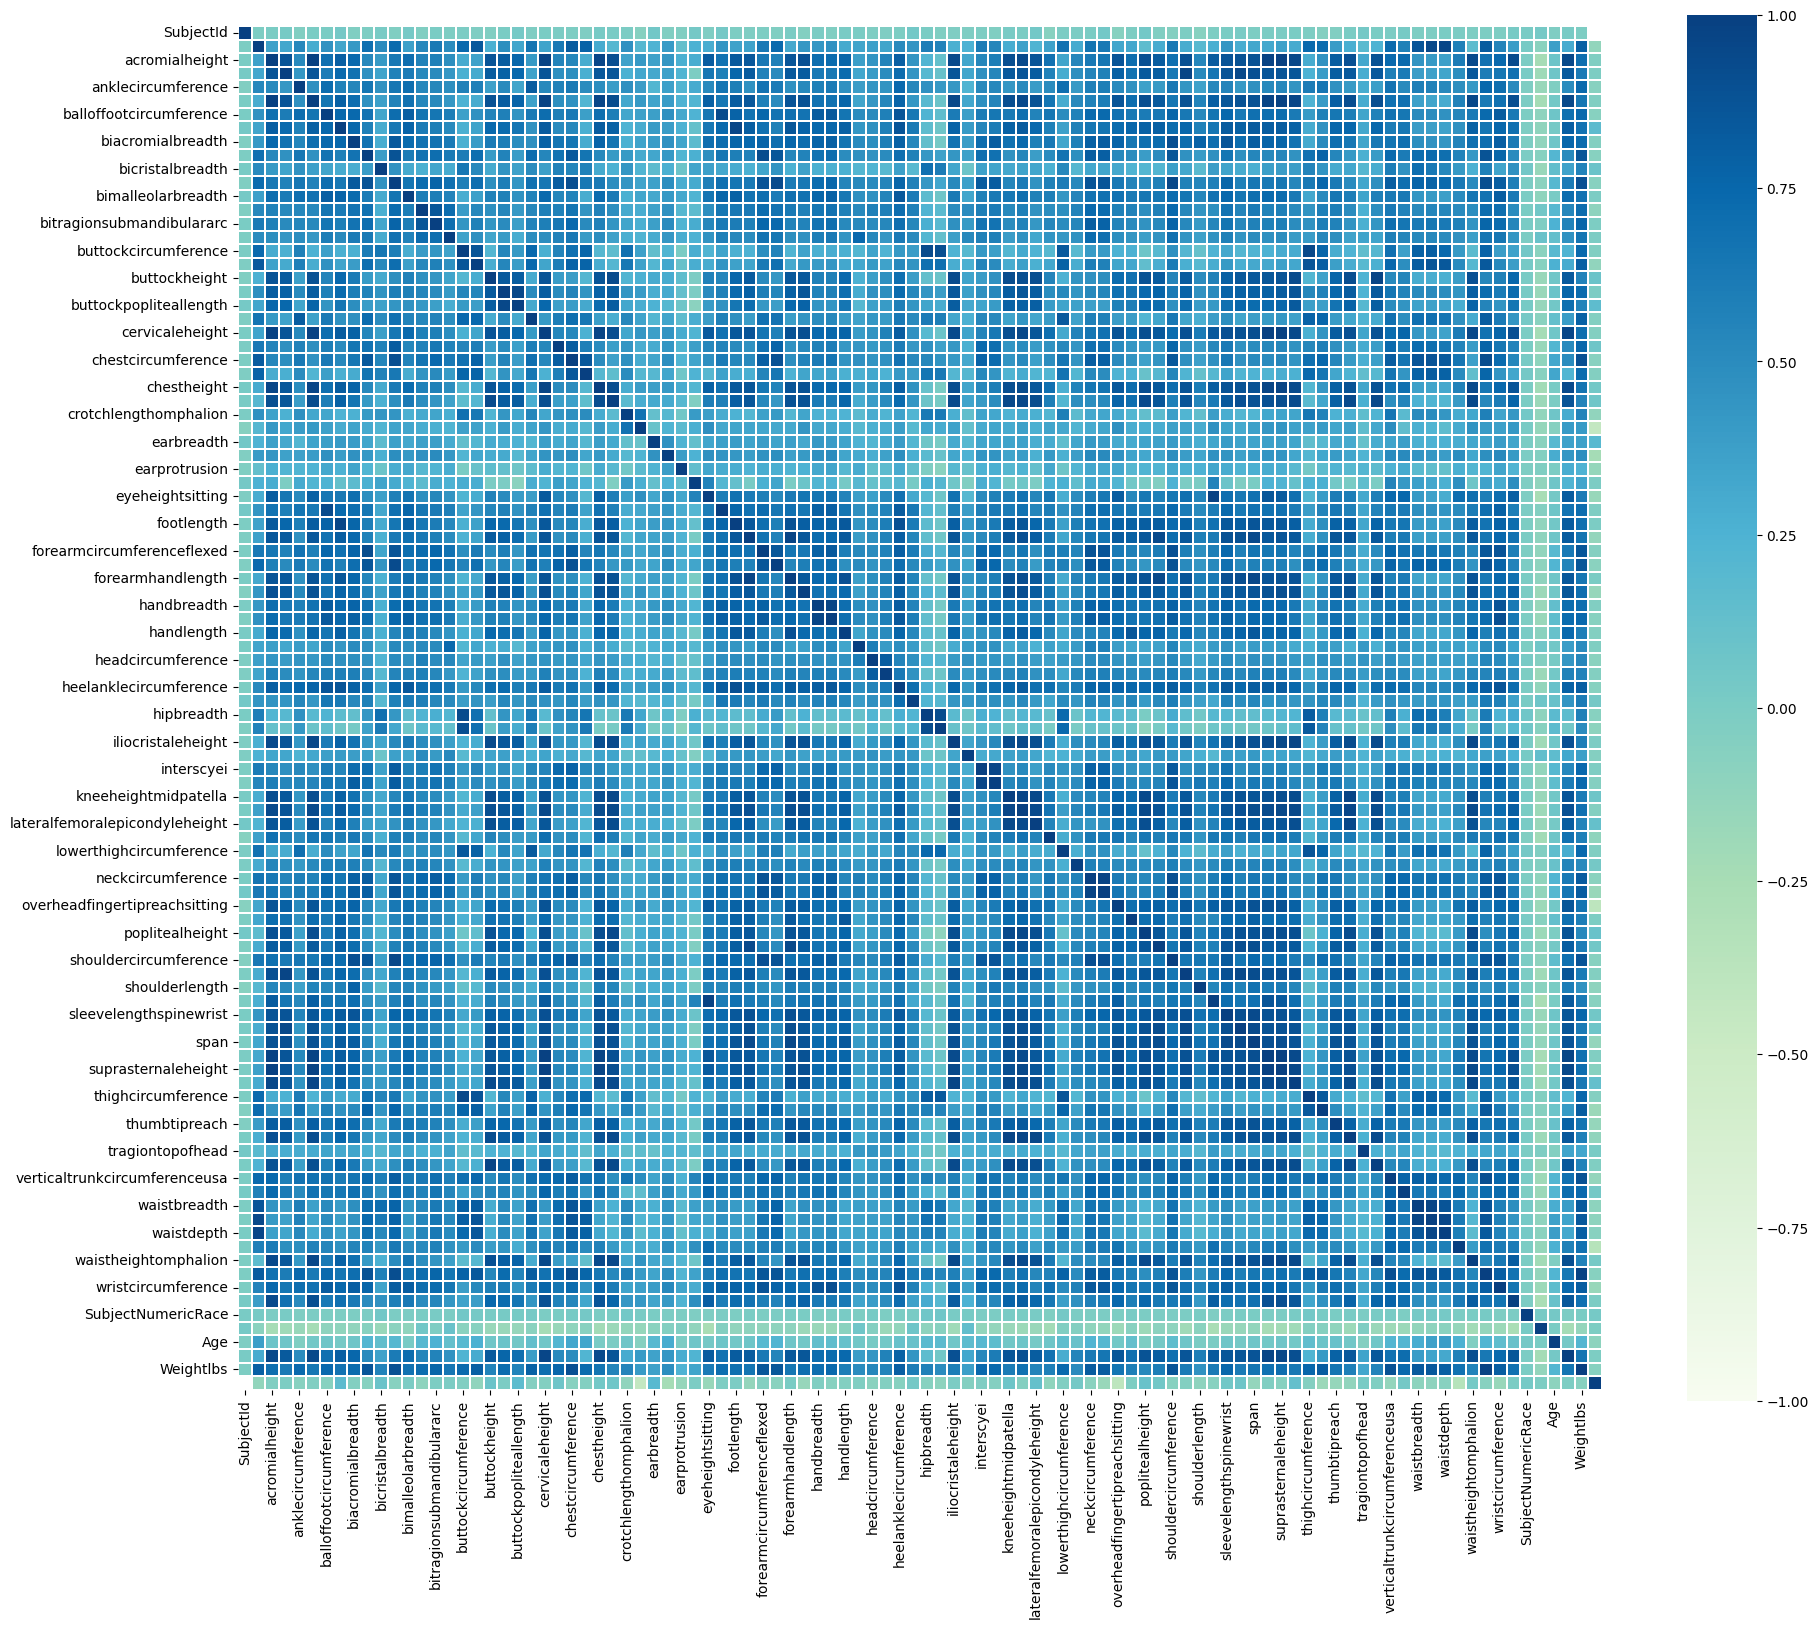

In [29]:
plt.figure(figsize=(22, 18))
sns.heatmap(df.corr(numeric_only=True), 
            vmin=-1,
            vmax= 1,
            cmap= 'GnBu', 
            linewidths=.12, 
            linecolor='white',
            fmt='.2g',
            square=True);

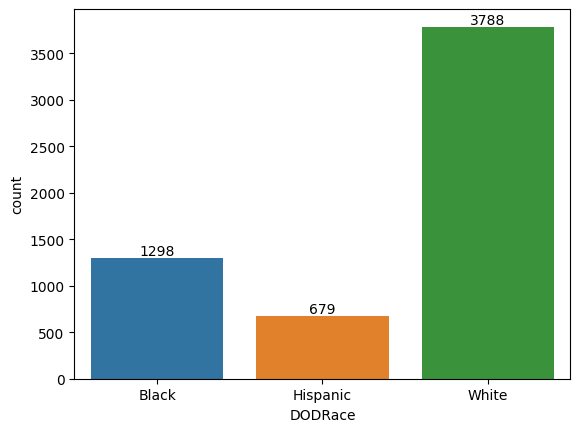

In [30]:
ax = sns.countplot(x="DODRace", data = df1)
for p in ax.containers:
    ax.bar_label(p)

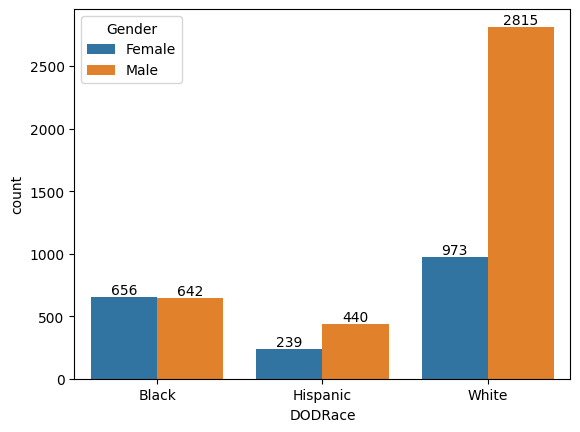

In [31]:
ax = sns.countplot(x="DODRace", hue="Gender", data = df1)
for p in ax.containers:
    ax.bar_label(p)

In [32]:
df1.corr(numeric_only=True)

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight
abdominalextensiondepthsitting,1.000000,0.351573,0.312588,0.518858,0.280444,0.456592,0.332313,0.417471,0.691134,0.506068,...,0.728490,0.571906,0.859053,0.939686,0.958726,0.579500,0.146621,0.825170,0.546830,0.383032
acromialheight,0.351573,1.000000,0.868157,0.504756,0.987102,0.693757,0.797692,0.733416,0.522861,0.401271,...,0.733429,0.727715,0.438378,0.404984,0.362105,0.606628,0.930891,0.677676,0.733644,0.921301
acromionradialelength,0.312588,0.868157,1.000000,0.415947,0.857274,0.603880,0.725700,0.667306,0.452457,0.343196,...,0.581489,0.609365,0.373401,0.354751,0.327797,0.480406,0.845704,0.595541,0.642371,0.677025
anklecircumference,0.518858,0.504756,0.415947,1.000000,0.461260,0.709790,0.561463,0.536724,0.637555,0.450531,...,0.665110,0.510456,0.585319,0.564055,0.510264,0.482210,0.408194,0.741304,0.697456,0.508700
axillaheight,0.280444,0.987102,0.857274,0.461260,1.000000,0.656760,0.784910,0.705118,0.457825,0.361232,...,0.674852,0.679672,0.362308,0.328195,0.289821,0.567173,0.946425,0.613435,0.685365,0.903064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
waistfrontlengthsitting,0.579500,0.606628,0.480406,0.482210,0.567173,0.548558,0.456270,0.550920,0.555349,0.407109,...,0.747357,0.719578,0.613504,0.621848,0.590321,1.000000,0.391622,0.679714,0.617996,0.617734
waistheightomphalion,0.146621,0.930891,0.845704,0.408194,0.946425,0.618294,0.777851,0.688386,0.405029,0.253061,...,0.539034,0.518771,0.232256,0.188706,0.150982,0.391622,1.000000,0.519443,0.632680,0.812689
weightkg,0.825170,0.677676,0.595541,0.741304,0.613435,0.730974,0.645218,0.703628,0.875388,0.580646,...,0.900083,0.724701,0.858913,0.872875,0.830978,0.679714,0.519443,1.000000,0.798285,0.665834
wristcircumference,0.546830,0.733644,0.642371,0.697456,0.685365,0.827121,0.743179,0.802931,0.760461,0.348045,...,0.746906,0.723490,0.578255,0.576763,0.552937,0.617996,0.632680,0.798285,1.000000,0.663650


# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [33]:
X=df1.drop("DODRace", axis=1)
y=df1["DODRace"]

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay,RocCurveDisplay
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score
from sklearn.model_selection import cross_validate, cross_val_score, GridSearchCV
from scikitplot.metrics import plot_precision_recall
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import matthews_corrcoef, cohen_kappa_score
import shap
import pickle
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder , StandardScaler

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=61)

print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (4612, 95)
Train target shape   :  (4612,)
Test features shape  :  (1153, 95)
Test target shape    :  (1153,)


In [36]:
def train_val(model, X_train, y_train, X_test, y_test):

    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : mean_squared_error(y_train, y_train_pred, squared=False),
    "mape" :mean_absolute_percentage_error(y_train, y_train_pred)},

    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : mean_squared_error(y_test, y_pred, squared=False),
    "mape" :mean_absolute_percentage_error(y_test, y_pred)}}

    return pd.DataFrame(scores)

### Column Transformer

In [37]:
cat_columns = list(df1.select_dtypes(include=['object']).columns)
cat_columns.remove('DODRace')

In [38]:
cat_columns

['Gender', 'RegionOrContinent']

In [39]:
column_trans = make_column_transformer((
               OneHotEncoder( handle_unknown='ignore',
                              sparse_output=False), 
                              cat_columns),
                              remainder = 'passthrough', 
                              verbose_feature_names_out=False).set_output(transform="pandas")

In [40]:
column_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['Gender', 'RegionOrContinent'])],
                  verbose_feature_names_out=False)

In [41]:
sc = MinMaxScaler()

In [42]:
sc

MinMaxScaler()

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

In [43]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    '''
    Description:
    This function gets a model, train and test sets and return 
    the confusion matrix and classification report
    
    INPUT:
    model - fitted model
    X_train - input features for the training set
    y_train - target values for training set
    X_test - input features for the testing set
    y_test - target values for testing set
    
    RETURN:
    Nothing

    '''
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    print()
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

### Scorrer for Hispanic Class

Hispanic class performed way worse during the early experiments, so our focus will be to increase the recall scores for this class 

In [44]:
f1_hespanic = make_scorer(f1_score, average=None, labels=['Hispanic'])

precision_hespanic = make_scorer(precision_score, average=None, labels=['Hispanic'])

recall_hespanic = make_scorer(recall_score, average=None, labels=['Hispanic'])


scoring = {'f1_hespanic': f1_hespanic,
           'precision_hespanic': precision_hespanic, 
           'recall_hespanic': recall_hespanic}

## 1. Logistic model

In [45]:
# Linear regression model
lr = LogisticRegression(max_iter=1000, random_state=61)
# setting max iteration to 1000 for multiclass to make sure solvers have enough iterations to converge
lr_pipe = make_pipeline(column_trans, sc, lr)

lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender',
                                                   'RegionOrContinent'])],
                                   verbose_feature_names_out=False)),
                ('minmaxscaler', MinMaxScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, random_state=61))])

In [46]:
eval_metric(lr_pipe, X_train, y_train, X_test, y_test)

Train_Set
[[ 908   27   87]
 [  43  257  242]
 [  27   38 2983]]
              precision    recall  f1-score   support

       Black       0.93      0.89      0.91      1022
    Hispanic       0.80      0.47      0.59       542
       White       0.90      0.98      0.94      3048

    accuracy                           0.90      4612
   macro avg       0.88      0.78      0.81      4612
weighted avg       0.89      0.90      0.89      4612


Test_Set
[[257   3  16]
 [  8  61  68]
 [ 11  11 718]]
              precision    recall  f1-score   support

       Black       0.93      0.93      0.93       276
    Hispanic       0.81      0.45      0.58       137
       White       0.90      0.97      0.93       740

    accuracy                           0.90      1153
   macro avg       0.88      0.78      0.81      1153
weighted avg       0.89      0.90      0.89      1153



### Vanilla Logistic Model

In [47]:
scores = cross_validate(lr_pipe,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv = 10,
                        n_jobs=-1,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_hespanic            0.549925
train_f1_hespanic           0.588018
test_precision_hespanic     0.762528
train_precision_hespanic    0.801048
test_recall_hespanic        0.433603
train_recall_hespanic       0.464535
dtype: float64

### Logistic Model GridsearchCV

In [48]:
lr_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse_output=False),
                                    ['Gender', 'RegionOrContinent'])],
                     verbose_feature_names_out=False)),
  ('minmaxscaler', MinMaxScaler()),
  ('logisticregression', LogisticRegression(max_iter=1000, random_state=61))],
 'verbose': False,
 'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse_output=False),
                                  ['Gender', 'RegionOrContinent'])],
                   verbose_feature_names_out=False),
 'minmaxscaler': MinMaxScaler(),
 'logisticregression': Logist

In [49]:
lr_param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1],
              'logisticregression__class_weight': ['balanced', {'White':1,'Hispanic':3.5,'Black':2}, 
              {'White':1,'Hispanic':4,'Black':2.5}, {'White':1,'Hispanic':4.5,'Black':2}],
              'logisticregression__penalty': ['l1', 'l2'],
              # from docs : For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;
              'logisticregression__solver': ['liblinear','sag','saga','newton-cg'],
              }

In [50]:
lr_param_grid

{'logisticregression__C': [0.001, 0.01, 0.1, 1],
 'logisticregression__class_weight': ['balanced',
  {'White': 1, 'Hispanic': 3.5, 'Black': 2},
  {'White': 1, 'Hispanic': 4, 'Black': 2.5},
  {'White': 1, 'Hispanic': 4.5, 'Black': 2}],
 'logisticregression__penalty': ['l1', 'l2'],
 'logisticregression__solver': ['liblinear', 'sag', 'saga', 'newton-cg']}

In [51]:
lr_model_grid = GridSearchCV(lr_pipe,
                              lr_param_grid ,
                              scoring=recall_hespanic,
                              cv=10,
                              n_jobs=-1,
                              return_train_score=True)
lr_model_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Gender',
                                                                          'RegionOrContinent'])],
                                                          verbose_feature_names_out=False)),
                                       ('minmaxscaler', MinMaxScaler()),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=100...
                         'logisticregression__class_weight': ['balanced',
                                                              {'Black': 2,
                                                               'Hispanic': 3.5,
                                                               'White': 1},
                                                              {'Black': 2.5,
                                                               'Hispanic': 4,
                                                               'White': 1},
                                                              {'Black': 2,
                                                               'Hispanic': 4.5,
                                                               'White': 1}],
                         'logisticregression__penalty': ['l1', 'l2'],
                         'logisticregression__solver': ['liblinear', 'sag',
                                                        'saga', 'newton-cg']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [52]:
lr_model_grid.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender',
                                                   'RegionOrContinent'])],
                                   verbose_feature_names_out=False)),
                ('minmaxscaler', MinMaxScaler()),
                ('logisticregression',
                 LogisticRegression(C=1, class_weight='balanced', max_iter=1000,
                                    random_state=61, solver='sag'))])

In [53]:
eval_metric(lr_model_grid, X_train, y_train, X_test, y_test)

Train_Set
[[ 930   64   28]
 [  33  416   93]
 [  83  394 2571]]
              precision    recall  f1-score   support

       Black       0.89      0.91      0.90      1022
    Hispanic       0.48      0.77      0.59       542
       White       0.96      0.84      0.90      3048

    accuracy                           0.85      4612
   macro avg       0.77      0.84      0.79      4612
weighted avg       0.88      0.85      0.86      4612


Test_Set
[[259  12   5]
 [  8 104  25]
 [ 20  81 639]]
              precision    recall  f1-score   support

       Black       0.90      0.94      0.92       276
    Hispanic       0.53      0.76      0.62       137
       White       0.96      0.86      0.91       740

    accuracy                           0.87      1153
   macro avg       0.80      0.85      0.82      1153
weighted avg       0.89      0.87      0.88      1153



In [54]:
pd.DataFrame(lr_model_grid.cv_results_).loc[
    lr_model_grid.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score     0.728586
mean_train_score    0.767525
Name: 101, dtype: object

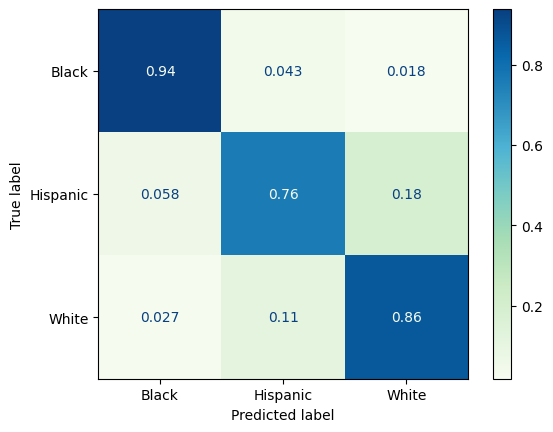

In [55]:
# normalize the matrix to show percentage of correctly classified samples
ConfusionMatrixDisplay.from_estimator(lr_model_grid,X_test, y_test,normalize='true', cmap='GnBu');

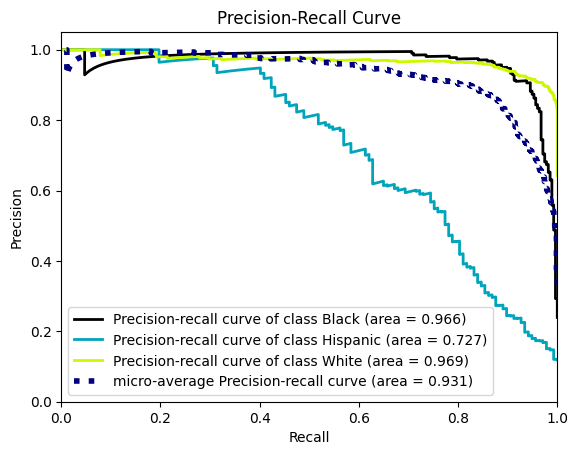

In [56]:
# getting classes probs from the tuned model

y_pred_proba = lr_model_grid.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

## 2. SVC

### Vanilla SVC model

In [57]:
# SVM model
svm = SVC(random_state=61)

svm_pipe = make_pipeline(column_trans, sc, svm)

svm_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender',
                                                   'RegionOrContinent'])],
                                   verbose_feature_names_out=False)),
                ('minmaxscaler', MinMaxScaler()),
                ('svc', SVC(random_state=61))])

In [58]:
eval_metric(svm_pipe, X_train, y_train, X_test, y_test)

Train_Set
[[ 917   15   90]
 [  45  176  321]
 [  17   17 3014]]
              precision    recall  f1-score   support

       Black       0.94      0.90      0.92      1022
    Hispanic       0.85      0.32      0.47       542
       White       0.88      0.99      0.93      3048

    accuracy                           0.89      4612
   macro avg       0.89      0.74      0.77      4612
weighted avg       0.89      0.89      0.87      4612


Test_Set
[[254   0  22]
 [  9  44  84]
 [  7   4 729]]
              precision    recall  f1-score   support

       Black       0.94      0.92      0.93       276
    Hispanic       0.92      0.32      0.48       137
       White       0.87      0.99      0.93       740

    accuracy                           0.89      1153
   macro avg       0.91      0.74      0.78      1153
weighted avg       0.89      0.89      0.87      1153



###  SVC Model GridsearchCV

In [59]:
svm_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse_output=False),
                                    ['Gender', 'RegionOrContinent'])],
                     verbose_feature_names_out=False)),
  ('minmaxscaler', MinMaxScaler()),
  ('svc', SVC(random_state=61))],
 'verbose': False,
 'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse_output=False),
                                  ['Gender', 'RegionOrContinent'])],
                   verbose_feature_names_out=False),
 'minmaxscaler': MinMaxScaler(),
 'svc': SVC(random_state=61),
 'columntransformer__n_jobs': None,
 'column

In [60]:
svm_param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'poly', 'rbf'],
    'svc__degree': [2, 3, 4],
    'svc__class_weight': ['balanced'] #not testing other weights to reduce compt time
}

In [61]:
svm_model_grid = GridSearchCV(svm_pipe,
                              svm_param_grid ,
                              scoring=recall_hespanic,
                              cv=10,
                              n_jobs=-1,
                              return_train_score=True)
svm_model_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Gender',
                                                                          'RegionOrContinent'])],
                                                          verbose_feature_names_out=False)),
                                       ('minmaxscaler', MinMaxScaler()),
                                       ('svc', SVC(random_state=61))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.1, 1, 10],
                         'svc__class_weight': ['balanced'],
                         'svc__degree': [2, 3, 4],
                         'svc__kernel': ['linear', 'poly', 'rbf']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [62]:
svm_model_grid.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender',
                                                   'RegionOrContinent'])],
                                   verbose_feature_names_out=False)),
                ('minmaxscaler', MinMaxScaler()),
                ('svc',
                 SVC(C=0.1, class_weight='balanced', degree=2, kernel='poly',
                     random_state=61))])

In [63]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Train_Set
[[ 915   70   37]
 [  31  422   89]
 [  69  411 2568]]
              precision    recall  f1-score   support

       Black       0.90      0.90      0.90      1022
    Hispanic       0.47      0.78      0.58       542
       White       0.95      0.84      0.89      3048

    accuracy                           0.85      4612
   macro avg       0.77      0.84      0.79      4612
weighted avg       0.88      0.85      0.86      4612


Test_Set
[[256  14   6]
 [  6 105  26]
 [ 19  93 628]]
              precision    recall  f1-score   support

       Black       0.91      0.93      0.92       276
    Hispanic       0.50      0.77      0.60       137
       White       0.95      0.85      0.90       740

    accuracy                           0.86      1153
   macro avg       0.79      0.85      0.81      1153
weighted avg       0.89      0.86      0.87      1153



In [64]:
pd.DataFrame(svm_model_grid.cv_results_).loc[
    svm_model_grid.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score     0.743434
mean_train_score    0.779004
Name: 1, dtype: object

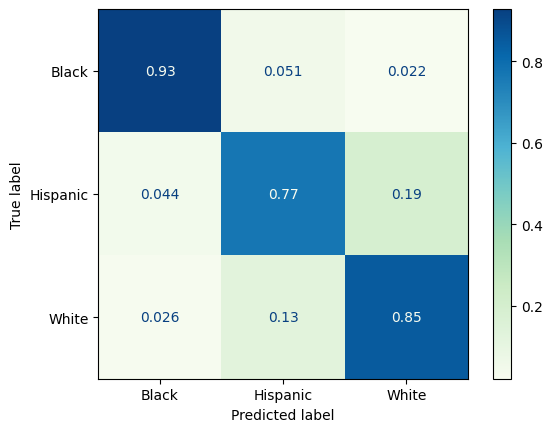

In [65]:
ConfusionMatrixDisplay.from_estimator(svm_model_grid,X_test, y_test,normalize='true', cmap='GnBu');

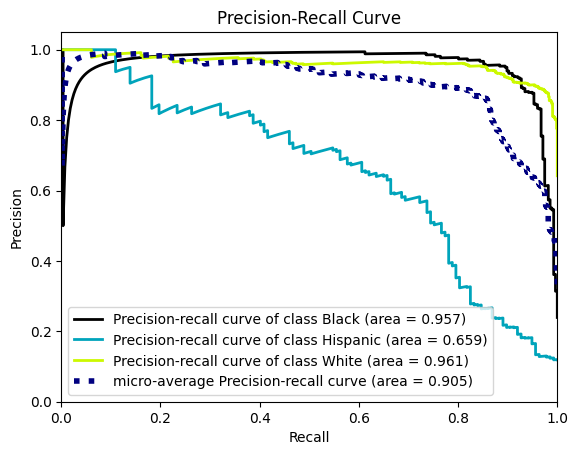

In [66]:
# getting classes probs from the tuned model
y_pred_proba = svm_model_grid.decision_function(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [67]:
# testing with f1 score
svm_model_grid2 = GridSearchCV(svm_pipe,
                              svm_param_grid ,
                              scoring=f1_hespanic,
                              cv=10,
                              n_jobs=-1,
                              return_train_score=True)
svm_model_grid2.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Gender',
                                                                          'RegionOrContinent'])],
                                                          verbose_feature_names_out=False)),
                                       ('minmaxscaler', MinMaxScaler()),
                                       ('svc', SVC(random_state=61))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.1, 1, 10],
                         'svc__class_weight': ['balanced'],
                         'svc__degree': [2, 3, 4],
                         'svc__kernel': ['linear', 'poly', 'rbf']},
             return_train_score=True,
             scoring=make_scorer(f1_score, average=None, labels=['Hispanic']))

In [71]:
pd.DataFrame(svm_model_grid2.cv_results_).loc[
    svm_model_grid2.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score     0.566013
mean_train_score    0.646786
Name: 10, dtype: object

In [72]:
eval_metric(svm_model_grid2, X_train, y_train, X_test, y_test)

Train_Set
[[ 943   56   23]
 [  25  440   77]
 [  62  337 2649]]
              precision    recall  f1-score   support

       Black       0.92      0.92      0.92      1022
    Hispanic       0.53      0.81      0.64       542
       White       0.96      0.87      0.91      3048

    accuracy                           0.87      4612
   macro avg       0.80      0.87      0.82      4612
weighted avg       0.90      0.87      0.88      4612


Test_Set
[[254  18   4]
 [  8 104  25]
 [ 26  79 635]]
              precision    recall  f1-score   support

       Black       0.88      0.92      0.90       276
    Hispanic       0.52      0.76      0.62       137
       White       0.96      0.86      0.90       740

    accuracy                           0.86      1153
   macro avg       0.79      0.85      0.81      1153
weighted avg       0.89      0.86      0.87      1153



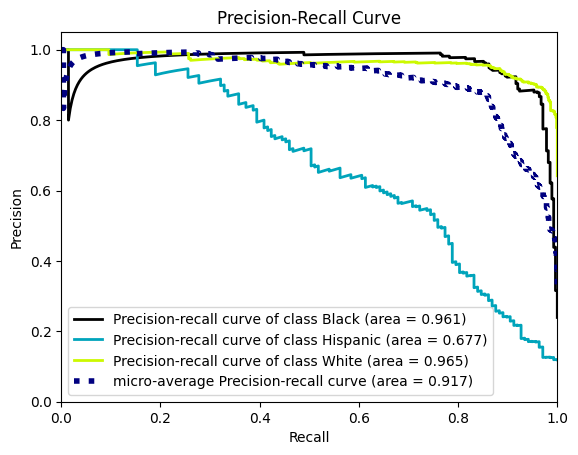

In [73]:
y_pred_proba = svm_model_grid2.decision_function(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

## 3. RF

### Vanilla RF Model

In [74]:
# tree-based models do not need one-hot encoding
ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value',
                         unknown_value=-1)


column_trans2 = make_column_transformer((ord_enc, cat_columns),
                                        remainder='passthrough',
                                        verbose_feature_names_out=False).set_output(transform="pandas")

In [75]:
# Vanilla RF
rf = RandomForestClassifier(random_state=2023)

rf_pipe = make_pipeline(column_trans2, rf) #no need for scaling 

rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'RegionOrContinent'])],
                                   verbose_feature_names_out=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=2023))])

In [76]:
eval_metric(rf_pipe, X_train, y_train, X_test, y_test)

Train_Set
[[1022    0    0]
 [   0  542    0]
 [   0    0 3048]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1022
    Hispanic       1.00      1.00      1.00       542
       White       1.00      1.00      1.00      3048

    accuracy                           1.00      4612
   macro avg       1.00      1.00      1.00      4612
weighted avg       1.00      1.00      1.00      4612


Test_Set
[[226   2  48]
 [ 12  10 115]
 [ 14   1 725]]
              precision    recall  f1-score   support

       Black       0.90      0.82      0.86       276
    Hispanic       0.77      0.07      0.13       137
       White       0.82      0.98      0.89       740

    accuracy                           0.83      1153
   macro avg       0.83      0.62      0.63      1153
weighted avg       0.83      0.83      0.79      1153



### RF Model GridsearchCV

In [77]:
rf_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('ordinalencoder',
                                    OrdinalEncoder(handle_unknown='use_encoded_value',
                                                   unknown_value=-1),
                                    ['Gender', 'RegionOrContinent'])],
                     verbose_feature_names_out=False)),
  ('randomforestclassifier', RandomForestClassifier(random_state=2023))],
 'verbose': False,
 'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('ordinalencoder',
                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                 unknown_value=-1),
                                  ['Gender', 'RegionOrContinent'])],
                   verbose_feature_names_out=False),
 'randomforestclassifier': RandomForestClassifier(random_state=2023),
 'columntra

In [78]:
rf_param_grid = {
    'randomforestclassifier__class_weight':['balanced', {'White':1,'Hispanic':3.5,'Black':2}, 
              {'White':1,'Hispanic':4,'Black':2.5}, {'White':1,'Hispanic':4.5,'Black':2}],
    'randomforestclassifier__criterion':['gini','entropy','logg_loss'],
    'randomforestclassifier__max_depth':[2,3,4,5]
}

In [79]:
rf_model_grid = GridSearchCV(rf_pipe,
                              rf_param_grid ,
                              scoring=recall_hespanic,
                              cv=10,
                              n_jobs=-1,
                              return_train_score=True)
rf_model_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Gender',
                                                                          'RegionOrContinent'])],
                                                          verbose_feature_names_out=False)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=2023))]),
             n_jo...
             param_grid={'randomforestclassifier__class_weight': ['balanced',
                                                                  {'Black': 2,
                                                                   'Hispanic': 3.5,
                                                                   'White': 1},
                                                                  {'Black': 2.5,
                                                                   'Hispanic': 4,
                                                                   'White': 1},
                                                                  {'Black': 2,
                                                                   'Hispanic': 4.5,
                                                                   'White': 1}],
                         'randomforestclassifier__criterion': ['gini',
                                                               'entropy',
                                                               'logg_loss'],
                         'randomforestclassifier__max_depth': [2, 3, 4, 5]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [80]:
rf_model_grid.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'RegionOrContinent'])],
                                   verbose_feature_names_out=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=2,
                                        random_state=2023))])

In [81]:
eval_metric(rf_model_grid, X_train, y_train, X_test, y_test)

Train_Set
[[ 673  235  114]
 [  52  370  120]
 [ 255 1191 1602]]
              precision    recall  f1-score   support

       Black       0.69      0.66      0.67      1022
    Hispanic       0.21      0.68      0.32       542
       White       0.87      0.53      0.66      3048

    accuracy                           0.57      4612
   macro avg       0.59      0.62      0.55      4612
weighted avg       0.75      0.57      0.62      4612


Test_Set
[[189  64  23]
 [  8  93  36]
 [ 68 297 375]]
              precision    recall  f1-score   support

       Black       0.71      0.68      0.70       276
    Hispanic       0.20      0.68      0.31       137
       White       0.86      0.51      0.64       740

    accuracy                           0.57      1153
   macro avg       0.59      0.62      0.55      1153
weighted avg       0.75      0.57      0.61      1153



In [82]:
pd.DataFrame(rf_model_grid.cv_results_).loc[
    rf_model_grid.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score     0.667912
mean_train_score    0.690852
Name: 4, dtype: object

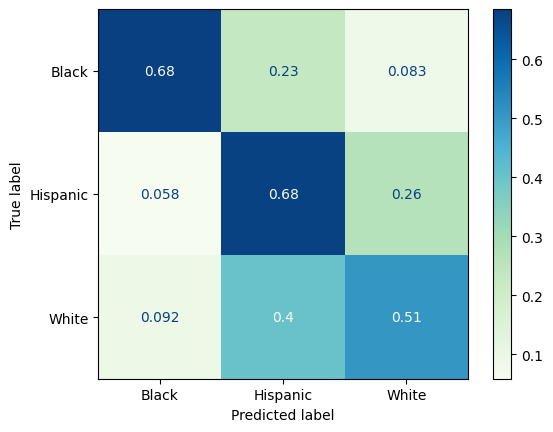

In [83]:
ConfusionMatrixDisplay.from_estimator(rf_model_grid,X_test, y_test,normalize='true', cmap='GnBu');

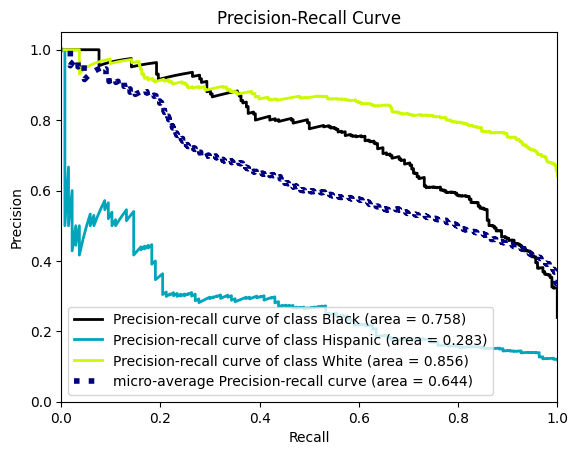

In [84]:
# getting classes probs from the tuned model
y_pred_proba = rf_model_grid.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [85]:
# testing with f1
rf_model_grid2 = GridSearchCV(rf_pipe,
                              rf_param_grid ,
                              scoring=f1_hespanic,
                              cv=10,
                              n_jobs=-1,
                              return_train_score=True)
rf_model_grid2.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Gender',
                                                                          'RegionOrContinent'])],
                                                          verbose_feature_names_out=False)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=2023))]),
             n_jo...
             param_grid={'randomforestclassifier__class_weight': ['balanced',
                                                                  {'Black': 2,
                                                                   'Hispanic': 3.5,
                                                                   'White': 1},
                                                                  {'Black': 2.5,
                                                                   'Hispanic': 4,
                                                                   'White': 1},
                                                                  {'Black': 2,
                                                                   'Hispanic': 4.5,
                                                                   'White': 1}],
                         'randomforestclassifier__criterion': ['gini',
                                                               'entropy',
                                                               'logg_loss'],
                         'randomforestclassifier__max_depth': [2, 3, 4, 5]},
             return_train_score=True,
             scoring=make_scorer(f1_score, average=None, labels=['Hispanic']))

In [86]:
pd.DataFrame(rf_model_grid2.cv_results_).loc[
    rf_model_grid2.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score     0.399519
mean_train_score    0.496464
Name: 39, dtype: object

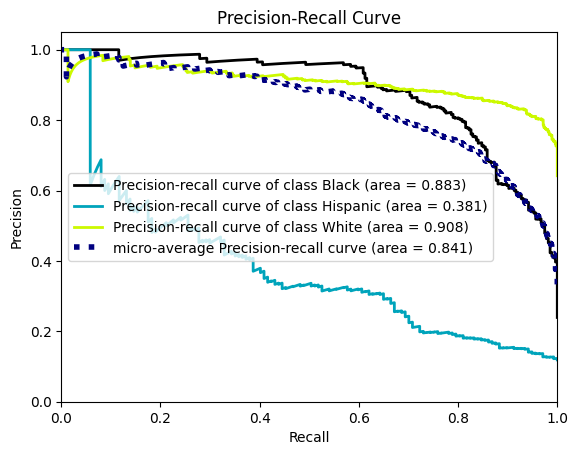

In [87]:
y_pred_proba = rf_model_grid2.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

## 4. XGBoost

### Vanilla XGBoost Model

In [88]:
# ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got ['Black' 'Hispanic' 'White']
y_train_encoded = y_train.map({'Black':0, 'Hispanic':1, 'White':2})
y_test_encoded = y_test.map({'Black':0, 'Hispanic':1, 'White':2})

In [89]:
# fixing the labels for scoring
xgb_f1_hespanic = make_scorer(f1_score, average=None, labels=[1])

xgb_precision_hespanic = make_scorer(precision_score, average=None, labels=[1])

xgb_recall_hespanic = make_scorer(recall_score, average=None, labels=[1])


xgb_scoring = {'f1_hespanic': xgb_f1_hespanic,
           'precision_hespanic': xgb_precision_hespanic, 
           'recall_hespanic': xgb_recall_hespanic}

In [90]:
# XGBoost 
xgb =  XGBClassifier(random_state=2023)

# no need for scaler 
# using ordinal transformer
xgb_pipe = make_pipeline(column_trans2, xgb)

xgb_pipe.fit(X_train, y_train_encoded)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'RegionOrContinent'])],
                                   verbose_feature_names_out=False)),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsam...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [91]:
eval_metric(xgb_pipe, X_train, y_train_encoded, X_test, y_test_encoded)

Train_Set
[[1022    0    0]
 [   0  542    0]
 [   0    0 3048]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1022
           1       1.00      1.00      1.00       542
           2       1.00      1.00      1.00      3048

    accuracy                           1.00      4612
   macro avg       1.00      1.00      1.00      4612
weighted avg       1.00      1.00      1.00      4612


Test_Set
[[249   2  25]
 [  6  53  78]
 [ 13   9 718]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       276
           1       0.83      0.39      0.53       137
           2       0.87      0.97      0.92       740

    accuracy                           0.88      1153
   macro avg       0.88      0.75      0.79      1153
weighted avg       0.88      0.88      0.87      1153



### XGBoost Model GridsearchCV

In [92]:
xgb_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('ordinalencoder',
                                    OrdinalEncoder(handle_unknown='use_encoded_value',
                                                   unknown_value=-1),
                                    ['Gender', 'RegionOrContinent'])],
                     verbose_feature_names_out=False)),
  ('xgbclassifier',
   XGBClassifier(base_score=None, booster=None, callbacks=None,
                 colsample_bylevel=None, colsample_bynode=None,
                 colsample_bytree=None, device=None, early_stopping_rounds=None,
                 enable_categorical=False, eval_metric=None, feature_types=None,
                 gamma=None, grow_policy=None, importance_type=None,
                 interaction_constraints=None, learning_rate=None, max_bin=None,
                 max_cat_threshold=None, max_cat_to_onehot=None,
                 max_delta_step=None, max

In [93]:
xgb_param_grid = {'xgbclassifier__n_estimators': [50,100,150,200],
                  'xgbclassifier__max_depth': [2, 3, 4, 5],
                  }
                  # 'xgbclassifier__scale_pos_weight' is only for binary classification

In [94]:
# computing the balanced weights for each class 
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

In [95]:
class_weights

array([1.50424005, 2.83640836, 0.50437445])

In [96]:
# into dict format
class_weights = {0: 1.4820167, 1: 2.8330264, 2: 0.50703142}

In [97]:
#  list of sample weights based on the labels
sample_weights = [class_weights[label] for label in y_train_encoded]

In [98]:
# passing the weights in pipeline fit caused an issue for me
kwargs = {xgb_pipe.steps[-1][0] + '__sample_weight': sample_weights}
# bug fix found for scikit-learn issues in github [3]

In [99]:
xgb_pipe.fit(X_train, y_train_encoded, **kwargs)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'RegionOrContinent'])],
                                   verbose_feature_names_out=False)),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsam...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [100]:
xgb_model_grid = GridSearchCV(xgb_pipe,
                             xgb_param_grid,
                             scoring=xgb_recall_hespanic, #update scorer
                             cv=10,
                             n_jobs=-1,
                             return_train_score=True)
xgb_model_grid.fit(X_train, y_train_encoded)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Gender',
                                                                          'RegionOrContinent'])],
                                                          verbose_feature_names_out=False)),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,...
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      objective='multi:softprob', ...))]),
             n_jobs=-1,
             param_grid={'xgbclassifier__max_depth': [2, 3, 4, 5],
                         'xgbclassifier__n_estimators': [50, 100, 150, 200]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=[1]))

In [101]:
xgb_model_grid.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'RegionOrContinent'])],
                                   verbose_feature_names_out=False)),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsam...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=150, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [103]:
eval_metric(xgb_model_grid, X_train, y_train_encoded, X_test, y_test_encoded)

Train_Set
[[1018    0    4]
 [   3  502   37]
 [   1    0 3047]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1022
           1       1.00      0.93      0.96       542
           2       0.99      1.00      0.99      3048

    accuracy                           0.99      4612
   macro avg       0.99      0.97      0.98      4612
weighted avg       0.99      0.99      0.99      4612


Test_Set
[[249   4  23]
 [  7  54  76]
 [ 14   7 719]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       276
           1       0.83      0.39      0.53       137
           2       0.88      0.97      0.92       740

    accuracy                           0.89      1153
   macro avg       0.88      0.76      0.79      1153
weighted avg       0.88      0.89      0.87      1153



In [104]:
# after fixing scorer
pd.DataFrame(xgb_model_grid.cv_results_).loc[
    xgb_model_grid.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score     0.385589
mean_train_score    0.953673
Name: 6, dtype: object

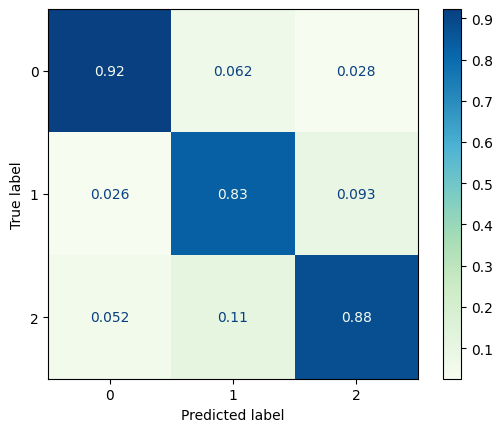

In [105]:
ConfusionMatrixDisplay.from_estimator(xgb_model_grid,X_test, y_test_encoded,normalize='pred', cmap='GnBu');

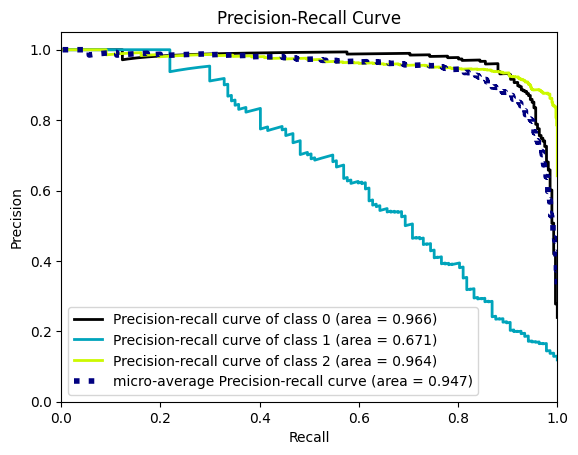

In [106]:
# getting classes probs from the tuned model
y_pred_proba = xgb_model_grid.predict_proba(X_test)

plot_precision_recall(y_test_encoded, y_pred_proba)
plt.show();

In [107]:
xgb_model_grid2 = GridSearchCV(xgb_pipe,
                             xgb_param_grid,
                             scoring=xgb_f1_hespanic, 
                             cv=10,
                             n_jobs=-1,
                             return_train_score=True)
xgb_model_grid2.fit(X_train, y_train_encoded)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Gender',
                                                                          'RegionOrContinent'])],
                                                          verbose_feature_names_out=False)),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,...
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      objective='multi:softprob', ...))]),
             n_jobs=-1,
             param_grid={'xgbclassifier__max_depth': [2, 3, 4, 5],
                         'xgbclassifier__n_estimators': [50, 100, 150, 200]},
             return_train_score=True,
             scoring=make_scorer(f1_score, average=None, labels=[1]))

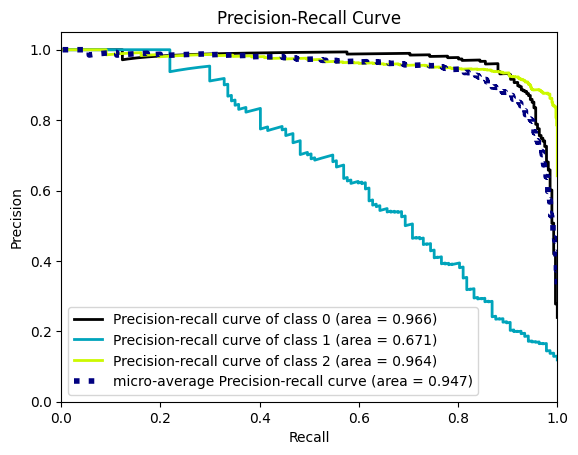

In [108]:
y_pred_proba = xgb_model_grid2.predict_proba(X_test)

plot_precision_recall(y_test_encoded, y_pred_proba)
plt.show();

In [109]:
# passing the trained vanilla models piplines


# logistic regression
lr_scores = cross_validate(lr_pipe,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv = 10,
                        n_jobs=-1,
                        return_train_score=True)

#support vector machines
svm_scores = cross_validate(svm_pipe,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv = 10,
                        n_jobs=-1,
                        return_train_score=True)
# random forest                   
rf_scores = cross_validate(rf_pipe,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv = 10,
                        n_jobs=-1,
                        return_train_score=True)                 
                     
# XGBoost                     
xgb_scores = cross_validate(xgb_pipe,
                        X_train,
                        y_train_encoded,
                        scoring=xgb_scoring,
                        cv = 10,
                        n_jobs=-1,
                        return_train_score=True)  

                     

In [110]:
vanilla_models_score = {
    'Logistic Regression': lr_scores,
    'Support Vector Machines': svm_scores,
    'Random Forest': rf_scores,
    'XGBoost': xgb_scores
}    

In [111]:
vanilla_models_score['Logistic Regression']['test_f1_hespanic'].mean()

0.5499253470927228

In [112]:
test_f1_hespanic_scores = {}

for model_name, model_scores in vanilla_models_score.items():
    test_f1_hespanic_score = model_scores['test_f1_hespanic'].mean()
    test_f1_hespanic_scores[model_name] = test_f1_hespanic_score

In [113]:
test_recall_hespanic_scores = {}

for model_name, model_scores in vanilla_models_score.items():
    test_recall_hespanic_score = model_scores['test_recall_hespanic'].mean()
    test_recall_hespanic_scores[model_name] = test_recall_hespanic_score

In [114]:
test_precision_hespanic_scores = {}

for model_name, model_scores in vanilla_models_score.items():
    test_precision_hespanic_score = model_scores['test_precision_hespanic'].mean()
    test_precision_hespanic_scores[model_name] = test_precision_hespanic_score

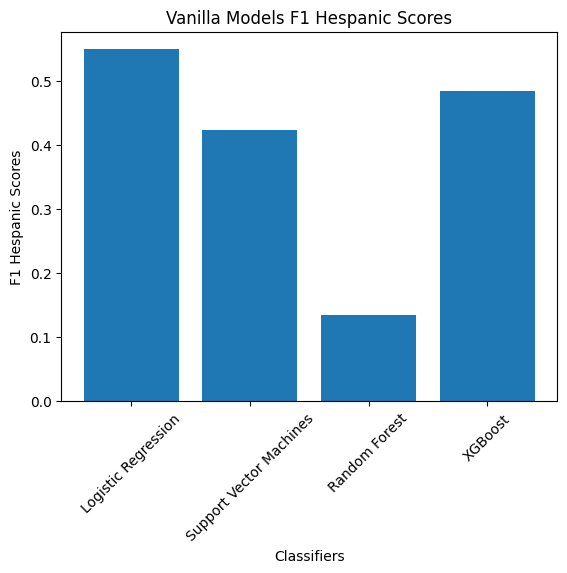

In [115]:
plt.bar(range(len(test_f1_hespanic_scores)), list(test_f1_hespanic_scores.values()), align='center')
plt.xticks(range(len(test_f1_hespanic_scores)), list(test_f1_hespanic_scores.keys()), rotation=45)
plt.xlabel('Classifiers')
plt.ylabel('F1 Hespanic Scores')
plt.title('Vanilla Models F1 Hespanic Scores')
plt.show()

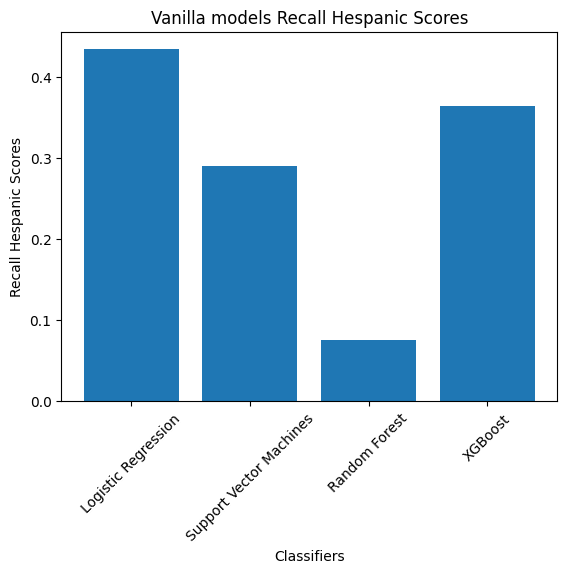

In [116]:
plt.bar(range(len(test_recall_hespanic_scores)), list(test_recall_hespanic_scores.values()), align='center')
plt.xticks(range(len(test_recall_hespanic_scores)), list(test_recall_hespanic_scores.keys()), rotation=45)
plt.xlabel('Classifiers')
plt.ylabel('Recall Hespanic Scores')
plt.title('Vanilla models Recall Hespanic Scores')
plt.show()

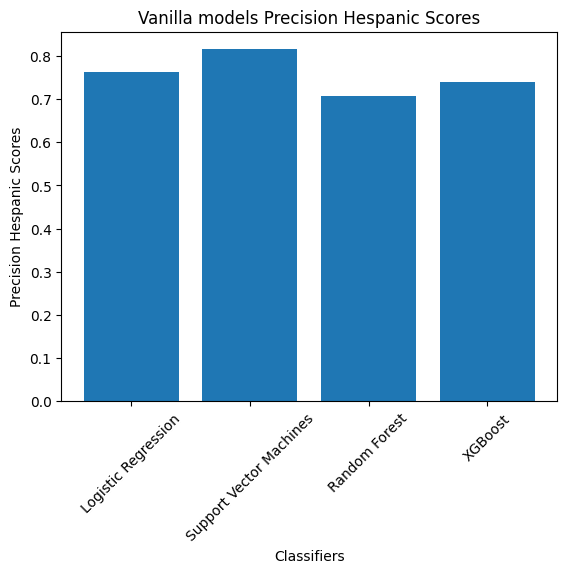

In [117]:
plt.bar(range(len(test_precision_hespanic_scores)), list(test_precision_hespanic_scores.values()), align='center')
plt.xticks(range(len(test_precision_hespanic_scores)), list(test_precision_hespanic_scores.keys()), rotation=45)
plt.xlabel('Classifiers')
plt.ylabel('Precision Hespanic Scores')
plt.title('Vanilla models Precision Hespanic Scores')
plt.show()

In [118]:
# passing the tuned models best scores
lr_result = pd.DataFrame(lr_model_grid.cv_results_).loc[
    lr_model_grid.best_index_, ["mean_test_score"]].values.item()

svm_result = pd.DataFrame(svm_model_grid.cv_results_).loc[
    svm_model_grid.best_index_, ["mean_test_score"]].values.item()

rf_result = pd.DataFrame(lr_model_grid.cv_results_).loc[
    lr_model_grid.best_index_, ["mean_test_score"]].values.item()

xgb_results = pd.DataFrame(xgb_model_grid.cv_results_).loc[
    xgb_model_grid.best_index_, ["mean_test_score"]].values.item()

In [119]:
tuned_models_scores = {
    'Logistic Regression': lr_result,
    'Support Vector Machines': svm_result,
    'Random Forest': rf_result,
    'XGBoost': xgb_results
}

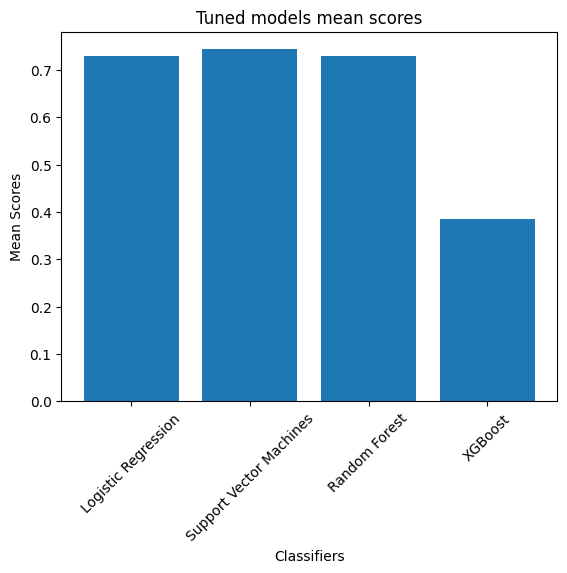

In [120]:
plt.bar(range(len(tuned_models_scores)), list(tuned_models_scores.values()), align='center')
plt.xticks(range(len(tuned_models_scores)), list(tuned_models_scores.keys()), rotation=45)
plt.xlabel('Classifiers')
plt.ylabel('Mean Scores')
plt.title('Tuned models mean scores')
plt.show()

In [121]:
# since XGBoost and random forest are overfitting we will not use them for the final comparison
lr_pipe_scores = cross_validate(lr_model_grid, X_test, y_test, scoring=scoring, n_jobs=-1,)
svm_pipe_scores = cross_validate(svm_model_grid, X_test, y_test, scoring=scoring, n_jobs=-1,)

In [122]:
# caclculating the mean scores from cross val
results = {
    'Pipeline': ['Logistic Regression', 'SVM'],
    'F1_Hispanic': [lr_pipe_scores['test_f1_hespanic'].mean(), svm_pipe_scores['test_f1_hespanic'].mean()],
    'Precision_Hispanic': [lr_pipe_scores['test_precision_hespanic'].mean(), svm_pipe_scores['test_precision_hespanic'].mean()],
    'Recall_Hispanic': [lr_pipe_scores['test_recall_hespanic'].mean(), svm_pipe_scores['test_recall_hespanic'].mean()]
}
compare = pd.DataFrame(results)  
compare

,Pipeline,F1_Hispanic,Precision_Hispanic,Recall_Hispanic
0,Logistic Regression,0.370088,0.301449,0.601852
1,SVM,0.509617,0.411430,0.670106


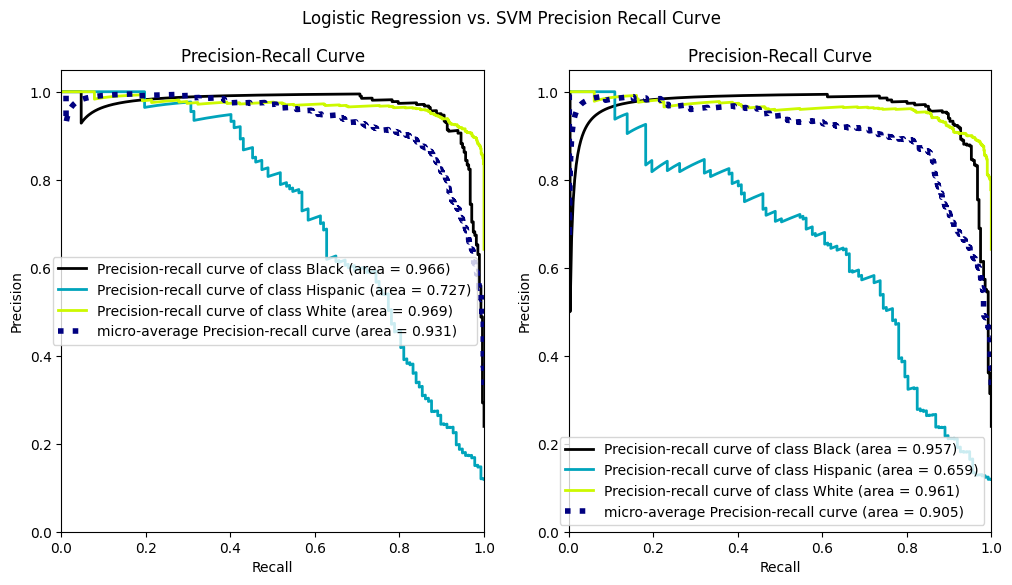

In [123]:
# displaying recall precision curves

y_pred_proba_lr = lr_model_grid.predict_proba(X_test)
y_pred_proba_svm = svm_model_grid.decision_function(X_test)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

plot_precision_recall(y_test, y_pred_proba_lr, ax=axs[0])
plot_precision_recall(y_test, y_pred_proba_svm, ax=axs[1])


plt.suptitle('Logistic Regression vs. SVM Precision Recall Curve')
plt.show()

---
---

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [124]:
#!pip install imblearn

In [125]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

## Logistic Regression Over/ Under Sampling

## Other Evaluation Metrics for Multiclass Classification

- Evaluation metrics
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [126]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef?
matthews_corrcoef(y_test, y_pred)

NameError: name 'y_pred' is not defined

Signature: matthews_corrcoef(y_true, y_pred, *, sample_weight=None)
Docstring:
Compute the Matthews correlation coefficient (MCC).

The Matthews correlation coefficient is used in machine learning as a
measure of the quality of binary and multiclass classifications. It takes
into account true and false positives and negatives and is generally
regarded as a balanced measure which can be used even if the classes are of
very different sizes. The MCC is in essence a correlation coefficient value
between -1 and +1. A coefficient of +1 represents a perfect prediction, 0
an average random prediction and -1 an inverse prediction.  The statistic
is also known as the phi coefficient. [source: Wikipedia]

Binary and multiclass labels are supported.  Only in the binary case does
this relate to information about true and false positives and negatives.
See references below.

Read more in the :ref:`User Guide <matthews_corrcoef>`.

Parameters
----------
y_true : array-like of shape (n_samples,)
    G

In [ ]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score?
cohen_kappa_score(y_test, y_pred)

0.7376215262514891

# Before the Deployment
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___